In [2]:
import numpy as np
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,Flatten,AveragePooling2D
from keras.datasets import mnist

In [3]:
(X_train,y_train),(X_test,y_test)=mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [4]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [5]:
#X_tran,y_train,X_test,y_test

In [6]:
X_test.max(),y_test.max

(255, <function ndarray.max>)

In [7]:
import cv2
import matplotlib.pyplot as plt

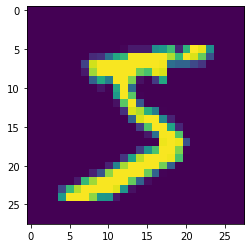

In [8]:
plt.imshow(X_train[0])
plt.show()

In [9]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [10]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

## **L-Net Architecture**

In [11]:
model1=Sequential()

model1.add(Conv2D(6,kernel_size=(5,5),activation='tanh',padding="valid",input_shape=(28,28,1)))
model1.add(AveragePooling2D(pool_size=(2,2), strides=2,padding='valid'))

model1.add(Conv2D(16,kernel_size=(5,5),activation='tanh',padding='valid'))
model1.add(AveragePooling2D(pool_size=(2,2), strides=2,padding='valid'))

model1.add(Flatten())

model1.add(Dense(120,activation='tanh'))
model1.add(Dense(84,activation='tanh'))

model1.add(Dense(10,activation='softmax'))

In [12]:
model1.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics='accuracy')

In [13]:
history1=model1.fit(X_train,y_train,epochs=10,validation_data=(X_test,y_test))

Epoch 1/10
1875/1875 [==============================] - 18s 4ms/step - loss: 0.1476 - accuracy: 0.9558 - val_loss: 0.0718 - val_accuracy: 0.9759
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0606 - accuracy: 0.9810 - val_loss: 0.0496 - val_accuracy: 0.9846
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0468 - accuracy: 0.9848 - val_loss: 0.0457 - val_accuracy: 0.9855
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0375 - accuracy: 0.9879 - val_loss: 0.0510 - val_accuracy: 0.9844
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0333 - accuracy: 0.9891 - val_loss: 0.0456 - val_accuracy: 0.9862
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0281 - accuracy: 0.9908 - val_loss: 0.0444 - val_accuracy: 0.9865
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0257 - accuracy: 0.9915 - val_loss: 0.0410 - val_accuracy

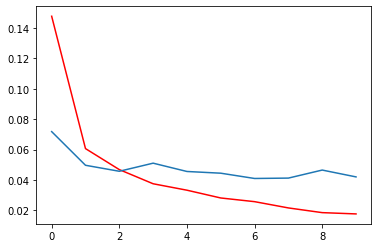

In [14]:
plt.plot(history1.history['loss'],c='r')
plt.plot(history1.history['val_loss'])
plt.show()

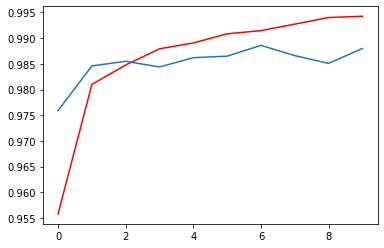

In [15]:
plt.plot(history1.history['accuracy'],c='r')
plt.plot(history1.history['val_accuracy'])
plt.show()

In [16]:
y_log=model1.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [18]:
y_log[0]

array([2.2750946e-06, 2.4053815e-08, 6.4148435e-07, 2.0204829e-05,
       5.0680175e-08, 6.9960855e-08, 2.2708825e-10, 9.9997556e-01,
       1.2721483e-07, 1.0603486e-06], dtype=float32)

In [19]:
y_log.shape

(10000, 10)

In [21]:
y_pred=y_log.argmax(axis=1)

In [24]:
y_pred[0]

7

In [25]:
y_test[0]

7

In [23]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)

0.988